<a href="https://colab.research.google.com/github/Honghai2102/AIO-EXERCISE/blob/feature%2FM05EX04/gd_momen_rms_adam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from sklearn.preprocessing import StandardScaler

## Problem

$$f(w_1, w_2) = 0.1w_1^2 + 2w_2^2 \;\;\;\;\;\;\;(1)$$

In [ ]:
def df_w(W):
    W_tensor = torch.tensor(W, requires_grad=True)
    f = 0.1 * W_tensor[0]**2 + 2 * W_tensor[1]**2
    f.backward()
    dW = W_tensor.grad.detach().numpy()
    return dW

In [ ]:
def plot_results(results):
    losses = [0.1 * w[0]**2 + 2 * w[1]**2 for w in results]
    print(f"Final loss: {losses[-1]}")

    plt.figure(figsize=(10, 5))
    plt.plot(losses, marker='o')
    plt.title('Loss Function Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid()
    plt.show()

## Gradient Descent

In [ ]:
def sgd(W, dW, lr):
    W = W - lr * dW
    return W

In [ ]:
def gd_train_p1(optimizer, lr, epochs):
    W = np.array([-5, -2], dtype=np.float32)
    results = [W]

    for epoch in range(epochs):
        dW = df_w(W)
        W = optimizer(W, dW, lr)
        results.append(W)

    return results

Final loss: 0.0167961413853159


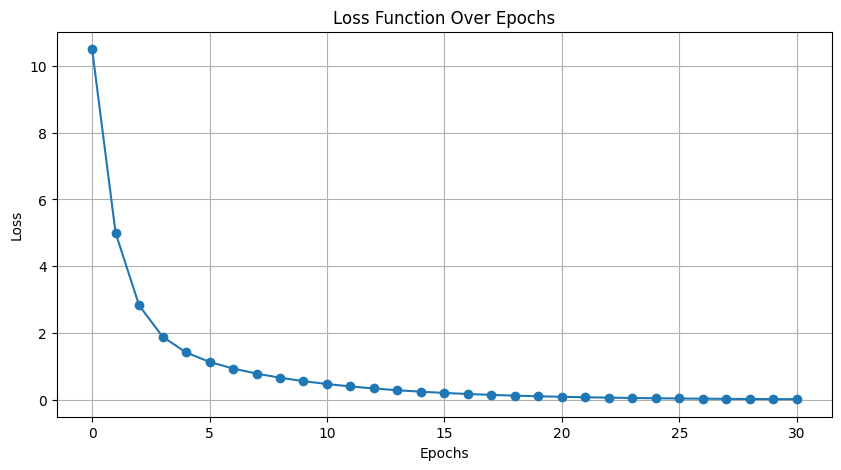

In [ ]:
results = gd_train_p1(sgd, lr=0.4, epochs=30)

plot_results(results)

## Momentum

In [ ]:
def sgd_momentum(W, dW, lr, V, beta):
    V = beta * V + (1 - beta) * dW
    W = W - lr * V
    return W, V

In [ ]:
def m_train_p1(optimizer, lr, epochs):
    W = np.array([-5, -2], dtype=np.float32)
    V = np.array([0, 0], dtype=np.float32)
    results = [W]

    for epoch in range(epochs):
        dW = df_w(W)
        W, V = optimizer(W, dW, lr, V, beta=0.5)
        results.append(W)

    return results

Final loss: 0.00037219628118851224


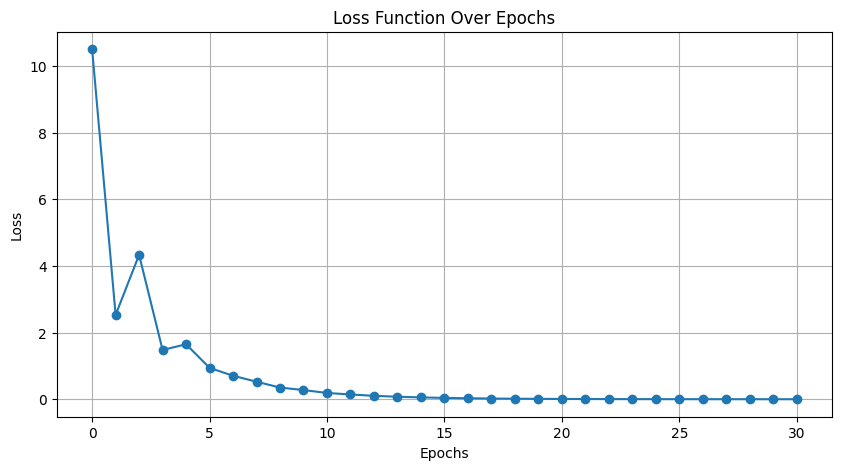

In [ ]:
results = m_train_p1(sgd_momentum, lr=0.6, epochs=30)

plot_results(results)

## RMSProp

In [ ]:
def RMSProp(W, dW, lr, S, gamma):
    epsilon = 1e-6

    S = gamma * S + (1 - gamma) * dW**2
    W = W - lr * dW / np.sqrt(S + epsilon)

    return W, S

In [ ]:
def rms_train_p1(optimizer, lr, epochs):
    W = np.array([-5, -2], dtype=np.float32)
    S = np.array([0, 0], dtype=np.float32)
    results = [W]

    for epoch in range(epochs):
        dW = df_w(W)
        W, S = optimizer(W, dW, lr, S, gamma=0.9)
        results.append(W)

    return results

Final loss: 9.034600316423304e-07


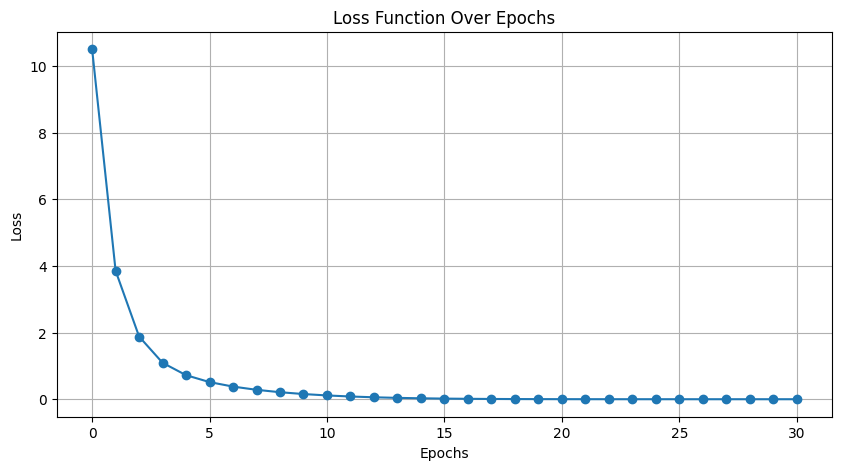

In [ ]:
results = rms_train_p1(RMSProp, lr=0.3, epochs=30)

plot_results(results)

## Adam

In [ ]:
def Adam(W, dW, lr, V, S, beta1, beta2, t):
    epsilon = 1e-6

    V = beta1 * V + (1 - beta1) * dW
    S = beta2 * S + (1 - beta2) * dW**2
    V_hat = V / (1 - beta1**t)
    S_hat = S / (1 - beta2**t)
    W = W - lr * V_hat / (np.sqrt(S_hat) + epsilon)

    return W, V, S

In [ ]:
def adam_train_p1(optimizer, lr, epochs):
    W = np.array([-5, -2], dtype=np.float32)
    V = np.array([0, 0], dtype=np.float32)
    S = np.array([0, 0], dtype=np.float32)
    results = [W]

    for t in range(1, epochs + 1):
        dW = df_w(W)
        W, V, S = optimizer(W, dW, lr, V, S, beta1=0.9, beta2=0.999, t=t)
        results.append(W)

    return results

Final loss: 0.010526963368129217


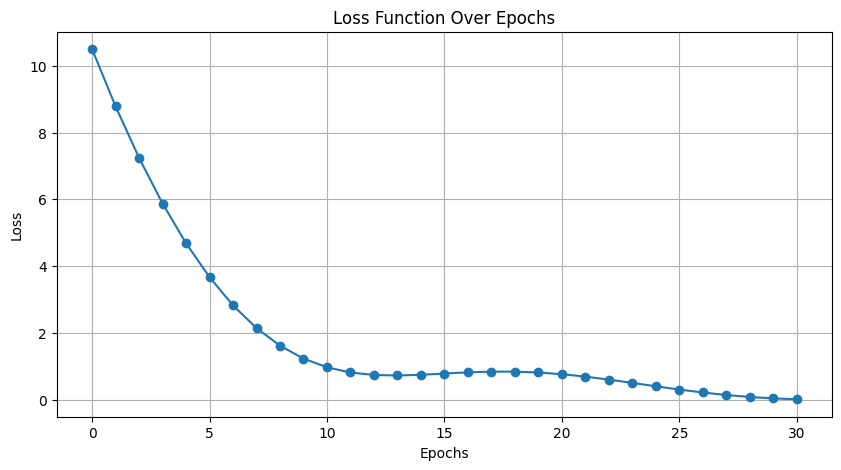

In [ ]:
results = adam_train_p1(Adam, lr=0.2, epochs=30)

plot_results(results)